# **_Stroke Prediction Project_**

Sirisha Mandava, Jeff Boczkaja, Mohamed Altoobli, Jesse Kranyak

Utilizing the Stroke Prediction Dataset from Kaggle we set out to make a machine learning program that will be able to accurately predict whether or not someone will have a stroke. We try out different models that provided us with varying results. We show our results using a few different metrics including balanced accuracy score, F1 scores, precision, and recall.

Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## What do the metrics measure?

### <u>Precision</u>
Precision measures the accuracy of positive predictions. It is the ratio of true positive predictions to the total number of positive predictions made. In other words, it answers the question, "Of all the instances the model predicted as positive, how many are actually positive?" Precision is particularly important in scenarios where the cost of a false positive is high.

Formula: Precision = True Positives / (True Positives + False Positives)

### <u>Recall</u>
Recall, also known as sensitivity or true positive rate, measures the ability of a model to find all the relevant cases within a dataset. It is the ratio of true positive predictions to the total number of actual positives. Recall answers the question, "Of all the actual positives, how many did the model successfully identify?" Recall is crucial in situations where missing a positive instance is costly.

Formula: Recall = True Positives / (True Positives + False Negatives)

### <u>F1 Score</u>
The F1 Score is the mean of precision and recall. It provides a single metric that balances both the precision and recall of a classification model, which is particularly useful when you want to compare two or more models. The F1 Score is especially valuable when the distribution of class labels is imbalanced. A high F1 Score indicates that the model has low false positives and low false negatives, so it's correctly identifying real positives and negatives.

Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

### <u>Balanced Accuracy Score</u>
Balanced Accuracy Score is defined as the average of recall obtained on each class, meaning it considers both the true positive rate and the true negative rate. It calculates the accuracy of the model by taking into account the balance between classes. For a binary classification problem, it would be the average of the proportion of correctly predicted positive observations to the total positive observations and the proportion of correctly predicted negative observations to the total negative observations.

Formula: Balanced Accuracy Score = (1/2) * ((TP / (TP + FN)) + (TN / (TN + FP)))

# Main Project

## 1. Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2. Analyzing and Exploring our Data

In [2]:
#Lets go ahead and loop through all of our columns and see what data they reveal

def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")
    for col in df.columns:
        col_dtype = df[col].dtype
        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")
describe_df(df)

The dataset contains 12 columns and 5110 rows

Column: id (int64)
--- Summary statistics:
 count     5110.000000
mean     36517.829354
std      21161.721625
min         67.000000
25%      17741.250000
50%      36932.000000
75%      54682.000000
max      72940.000000
Name: id, dtype: float64

Column: gender (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Male' 'Female' 'Other']

Column: age (float64)
--- Summary statistics:
 count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Column: hypertension (int64)
--- Summary statistics:
 count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

Column: heart_disease (int64)
--- Summary statistics:
 count    5110.000000
mean        0.054012
std        

### Check balance of our target which is 'stroke'

In [3]:
df['stroke'].value_counts() # We have pretty imbalanced data!

stroke
0    4861
1     249
Name: count, dtype: int64

### Drop unneeded column of 'id'

In [4]:
df = df.drop('id', axis=1)

### Check nulls and drop them if present

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.dropna()

### Distribution of Ages

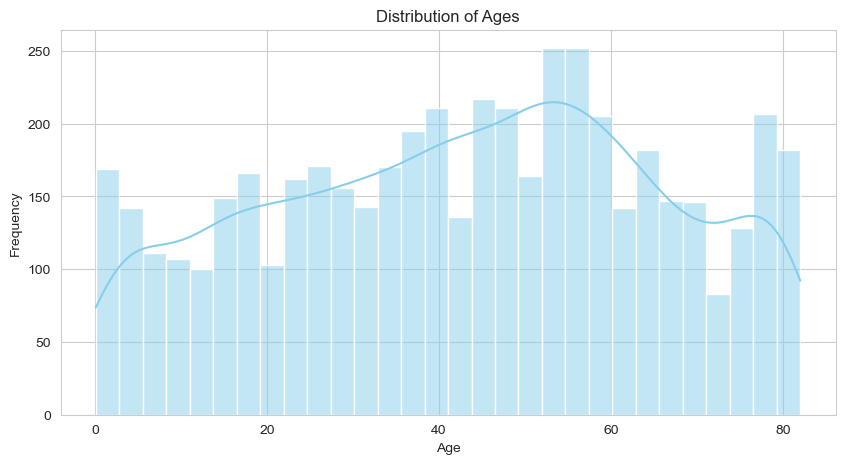

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of ages
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Heatmap of Numerical Factors

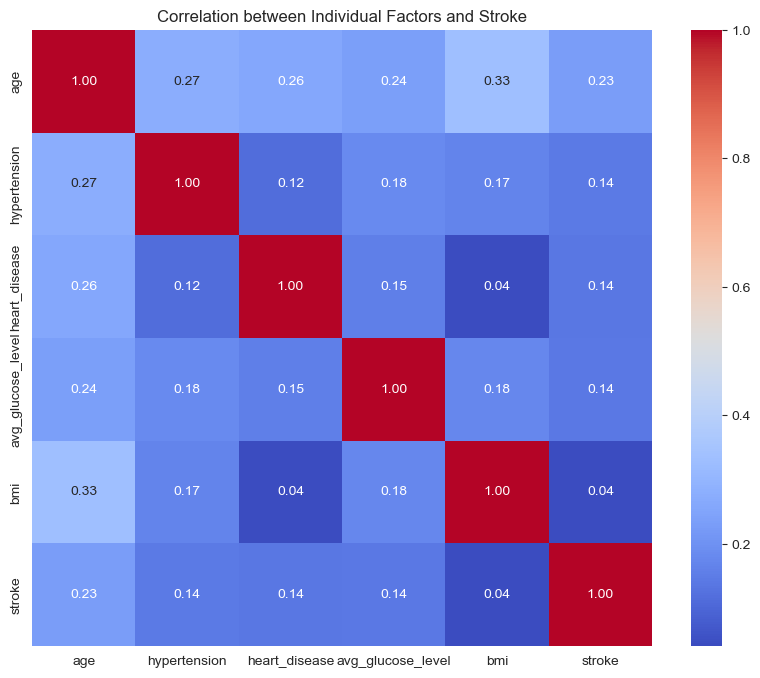

In [8]:
df_corr = df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Individual Factors and Stroke')
plt.show()

### Glucose Levels by Different Age Groups

C:\Users\whitl\AppData\Local\Temp\ipykernel_24196\2875037917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='avg_glucose_level', data=df, palette="coolwarm")


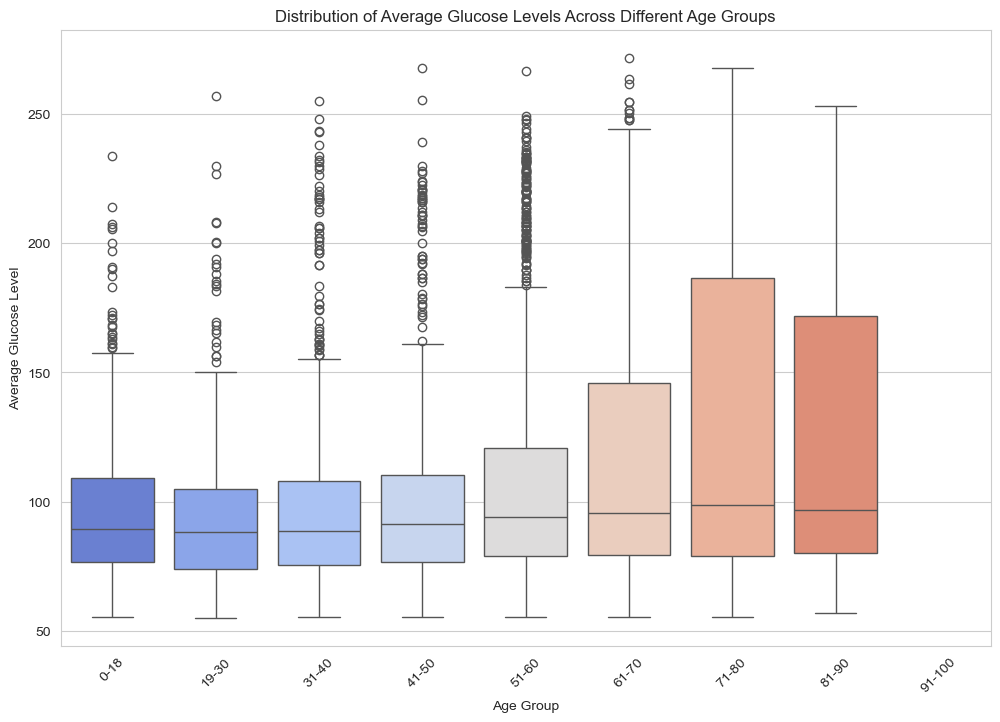

In [9]:
# Creating age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='avg_glucose_level', data=df, palette="coolwarm")
plt.title('Distribution of Average Glucose Levels Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')
plt.xticks(rotation=45)
plt.show()

## Who is having the strokes?

In [10]:
# Calculate the minimum age of someone who had a stroke
min_age_stroke = df[df['stroke'] == 1]['age'].min()
print(f'Youngest person in data with stroke: {min_age_stroke} years')

Youngest person in data with stroke: 14.0 years


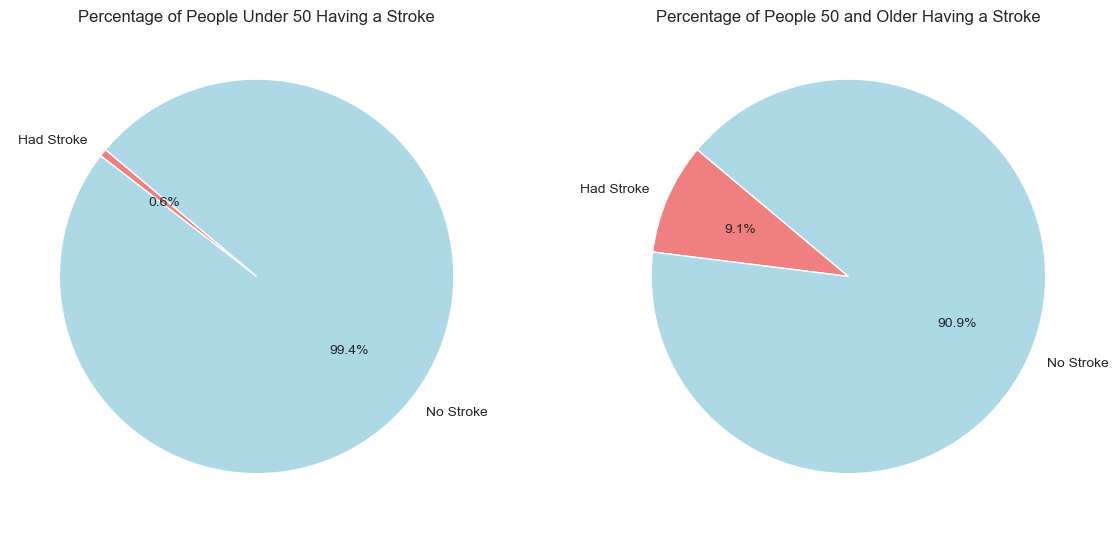

In [11]:
# # Assuming 'df' is your DataFrame containing the stroke data
# min_age_stroke = df[df['stroke'] == 1]['age'].min()

under_50_stroke = df[(df['age'] < 50) & (df['stroke'] == 1)].shape[0]
total_under_50 = df[df['age'] < 50].shape[0]
percentage_under_50_stroke = (under_50_stroke / total_under_50) * 100

over_50_stroke = df[(df['age'] >= 50) & (df['stroke'] == 1)].shape[0]
total_over_50 = df[df['age'] >= 50].shape[0]
percentage_over_50_stroke = (over_50_stroke / total_over_50) * 100

# Pie Charts for strokes based on age
labels = ['Had Stroke', 'No Stroke']
sizes_under_50 = [percentage_under_50_stroke, 100 - percentage_under_50_stroke]
sizes_over_50 = [percentage_over_50_stroke, 100 - percentage_over_50_stroke]
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for individuals under 50
axs[0].pie(sizes_under_50, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
axs[0].set_title('Percentage of People Under 50 Having a Stroke')

# Pie chart for individuals 50 and older
axs[1].pie(sizes_over_50, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
axs[1].set_title('Percentage of People 50 and Older Having a Stroke')

plt.show()

## 3. Encoding our data for use in machine learning

In machine learning, encoding data is essential for preparing categorical variables to be used as input in algorithms. Since most machine learning models require numerical data, categorical variables such as gender, smoking status, or work type need to be encoded into numerical form. This process ensures that the model can effectively interpret and learn from these features, enabling it to make accurate predictions or classifications based on the input data.

### Check data types, we will convert objects into categorical variables to be encoded

In [12]:
df.dtypes

gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
age_group            category
dtype: object

In [13]:
# Define categorical features for encoding
catFeatures = ['gender','ever_married','work_type','Residence_type','smoking_status']
# Describe the categorical features to see the number of unique categories in each
df[catFeatures].describe(include='all').loc['unique', :]

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
Name: unique, dtype: object

### Convert objects to categorical variables

In [14]:
# Convert categorical columns to 'category' dtype for efficient encoding
df[['gender','ever_married','work_type','Residence_type','smoking_status']] = df[['gender','ever_married','work_type','Residence_type','smoking_status']].astype('category')
df.dtypes

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
age_group            category
dtype: object

In [15]:
# Encode categorical features as integers
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[column] = df[column].astype('category').cat.codes

In [16]:
# Print the unique values in the encoded categorical columns for verification
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'gender': [1 0 2]
Unique values in 'ever_married': [1 0]
Unique values in 'work_type': [2 3 0 4 1]
Unique values in 'Residence_type': [1 0]
Unique values in 'smoking_status': [1 2 3 0]


### Check counts on gender, see if it is significant

In [17]:
# Check the distribution of values in the 'gender' column
df['gender'].value_counts() # We'll treat it as a binary!

gender
0    2897
1    2011
2       1
Name: count, dtype: int64

In [18]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,61-70
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,71-80
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,41-50
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,71-80
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,81-90


### Create synthetic balance in the dataset using SMOTE

Due to the imbalance in our dataset we utilize SMOTE and SMOTENC to create synthetic data to improve the outcomes of our machine learning models.

**You can choose either model, press 'ctrl + /' to uncomment or comment out code choice.** \
Rerun model with new choices for different outcomes

## SMOTE
We will use SMOTE and create synthetic data for both training and test.

In [19]:
oversampled = SMOTE()
eval_df = df[['gender','age','hypertension','heart_disease','smoking_status','avg_glucose_level','bmi','stroke']].sample(int(df.shape[0]*0.2),random_state=42)
train_df = df.drop(index=eval_df.index)

X_test,y_test = eval_df[['gender','age','hypertension','heart_disease','smoking_status','avg_glucose_level','bmi']], eval_df['stroke']
X_train,y_train = train_df[['gender','age','hypertension','heart_disease','smoking_status','avg_glucose_level','bmi']], train_df['stroke']


X_train, y_train = oversampled.fit_resample(X_train,y_train)
usampled_df = X_train.assign(Stroke = y_train)

X_test,y_test = oversampled.fit_resample(X_test,y_test)
usampled_eval_df = X_test.assign(Stroke = y_test)

## SMOTENC
Another option is to use SMOTENC that creates only synthetic data for the training data

In [ ]:
# # Run train test split
# X = df.drop(['stroke'], axis=1)
# y = df['stroke']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

In [ ]:
# oversample = SMOTENC(categorical_features=[0,2,3,4,5,6,9], 
#                     random_state=27,  # for reproducibility
#                     sampling_strategy='auto')

# X_train, y_train = oversample.fit_resample(X_train, y_train)
# X_test, y_test = oversample.fit_resample(X_test, y_test)

# print('Original class distribution: \n')
# print(y_train.value_counts())
# print('-----------------------------------------')
# print('Synthetic sample class distribution: \n')
# print(pd.Series(y_train_res).value_counts())

## 4. Choose scaling method

**You can choose either model, press 'ctrl + /' to uncomment or comment out code choice.**

 <u>Normalization<u/> rescales the features to a fixed range, usually 0 to 1. 

Advantages:

 - Useful when you need to bound your values between a specific range.
 - Maintains the original distribution without distorting differences in the ranges of values.

Disadvantages:

 - If your data contains outliers, normalization can squash the "normal" data into a small portion of the range, reducing the      algorithm's ability to learn from it.

<u>Standardization<u/> rescales data so that it has a mean of 0 and a standard deviation of 1.

Advantages:

 - Standardization does not bound values to a specific range, which might be useful for certain algorithms that assume no specific range.
 - More robust to outliers compared to normalization.

Disadvantages:

 - The resulting distribution will have a mean of 0 and a standard deviation of 1, but it might not be suitable for algorithms that expect input data to be within a bounded range.

### Normalization

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Selecting numerical columns that need normalization
# numerical_cols = ['age', 'avg_glucose_level', 'work_type', 'bmi', 'smoking_status']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit on training data
# scaler.fit(X_train[numerical_cols])

# # Transform both training and testing data
# X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns that need normalization
numerical_cols = ['age', 'avg_glucose_level', 'smoking_status', 'bmi']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train[numerical_cols])

# Transform both training and testing data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [21]:
# Verify processing worked
X_train.head(3)

,gender,age,hypertension,heart_disease,smoking_status,avg_glucose_level,bmi
0,1,0.546538,0,1,-0.350252,1.895829,1.078605
1,1,1.136005,0,1,0.714762,-0.265780,0.460498
2,0,-0.269647,0,0,1.779775,0.884132,0.746938


In [22]:
# Verify processing worked
X_test.head(3)

,gender,age,hypertension,heart_disease,smoking_status,avg_glucose_level,bmi
0,1,1.136005,0,1,-1.415265,0.075795,0.520801
1,0,-0.587052,0,0,0.714762,-0.651197,0.294664
2,1,0.501195,1,0,0.714762,-0.811949,0.400195


In [23]:
display(X_train.shape)
display(X_train.info())
display(X_train.describe())
display(X_train.columns)

(7544, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7544 non-null   int8   
 1   age                7544 non-null   float64
 2   hypertension       7544 non-null   int64  
 3   heart_disease      7544 non-null   int64  
 4   smoking_status     7544 non-null   float64
 5   avg_glucose_level  7544 non-null   float64
 6   bmi                7544 non-null   float64
dtypes: float64(4), int64(2), int8(1)
memory usage: 361.1 KB


None

,gender,age,hypertension,heart_disease,smoking_status,avg_glucose_level,bmi
count,7544.000000,7.544000e+03,7544.000000,7544.000000,7.544000e+03,7.544000e+03,7.544000e+03
mean,0.322375,-1.205587e-16,0.088812,0.043081,-1.280936e-16,-1.205587e-16,-1.356285e-16
std,0.467700,1.000066e+00,0.284491,0.203052,1.000066e+00,1.000066e+00,1.000066e+00
min,0.000000,-2.487856e+00,0.000000,0.000000,-1.415265e+00,-1.160215e+00,-2.735567e+00
25%,0.000000,-5.870519e-01,0.000000,0.000000,-3.502516e-01,-7.502610e-01,-6.098824e-01
50%,0.000000,1.837893e-01,0.000000,0.000000,-3.502516e-01,-4.093470e-01,-1.123817e-01
75%,1.000000,8.639433e-01,0.000000,0.000000,7.147617e-01,7.256594e-01,4.990270e-01
max,2.000000,1.226692e+00,1.000000,1.000000,1.779775e+00,2.653809e+00,9.430587e+00


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_status',
       'avg_glucose_level', 'bmi'],
      dtype='object')

## 5. Decision Tree

A decision tree is a hierarchical model that helps in making decisions by mapping out possible outcomes based on different conditions. It's a visual representation where each branch represents a decision based on features in the data, ultimately leading to a prediction or classification.

In [24]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [25]:
y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
print(y_pred_test)

[0 0 0 ... 0 0 0]


In [26]:
print('Classification Report for Testing:')
print(classification_report(y_test, y_pred_test))

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       928
           1       0.81      0.39      0.53       928

    accuracy                           0.65      1856
   macro avg       0.70      0.65      0.62      1856
weighted avg       0.70      0.65      0.62      1856



In [28]:
dt_bas = round(balanced_accuracy_score(y_test, y_pred),2)
print(f'Decision Tree balanced accuracy score {dt_bas}')

Decision Tree balanced accuracy score 0.65


In [29]:
# Place scores in dictionar
metrics_test = precision_recall_fscore_support(y_test, y_pred, average='binary')
dt_results = {
    'Method': 'Decision Tree',
    'Precision': round(metrics_test[0],2),
    'Recall': round(metrics_test[1],2),
    'F1 Score': round(metrics_test[2],2),
    'Balanced Accuracy': dt_bas
}

In [30]:
dt_results

{'Method': 'Decision Tree',
 'Precision': 0.81,
 'Recall': 0.39,
 'F1 Score': 0.53,
 'Balanced Accuracy': 0.65}

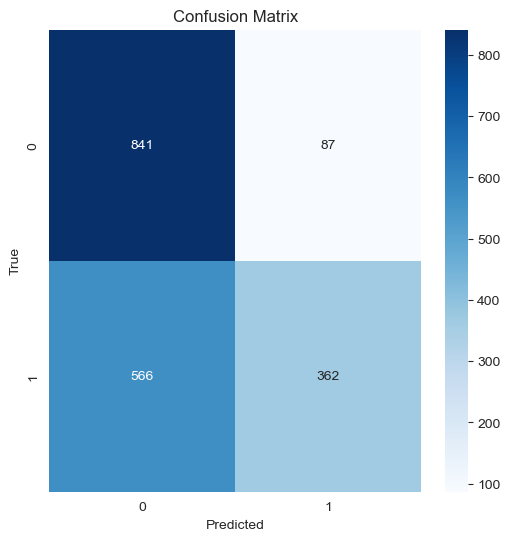

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### We will find a good max_depth to run with our model to see if we can improve

In [32]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,15):
    models['max_depth'].append(depth)
    model = DecisionTreeClassifier( max_depth=depth)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

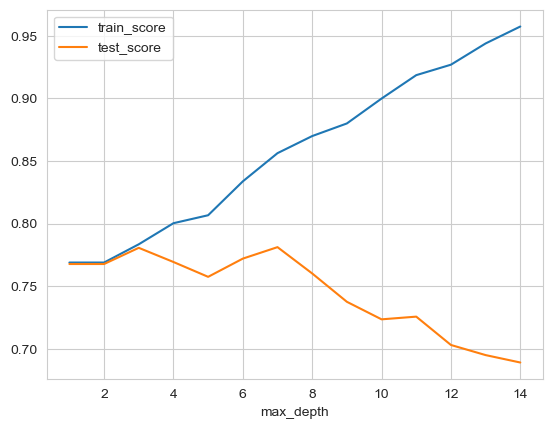

In [33]:
models_df.plot(x='max_depth')

You want to pick the max_depth where the test_score peaks.

In [34]:
model = DecisionTreeClassifier(max_depth=7, random_state=42) # Insert max_depth from above graph
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt_md_bas = round(balanced_accuracy_score(y_test, y_pred),2)

In [35]:
print(f'Random Forest with adjusted max_depth balanced accuracy score: {dt_md_bas}') # The tuning should increase the score!

Random Forest with adjusted max_depth balanced accuracy score: 0.78


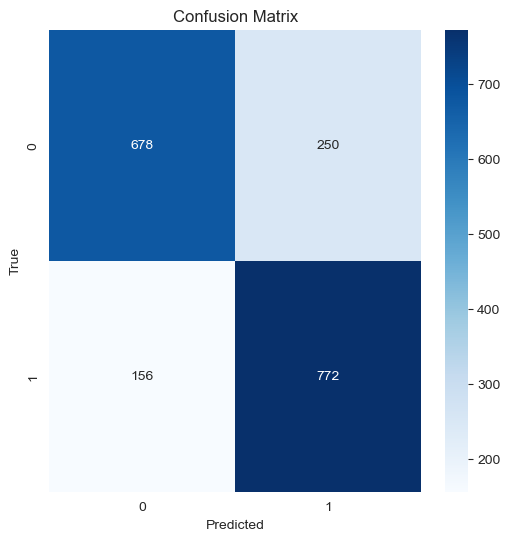

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print('Classification Report for Testing:')
print(classification_report(y_test, y_pred_test))

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       928
           1       0.81      0.39      0.53       928

    accuracy                           0.65      1856
   macro avg       0.70      0.65      0.62      1856
weighted avg       0.70      0.65      0.62      1856



In [38]:
# Place scores in dictionary
metrics_test = precision_recall_fscore_support(y_test, y_pred, average='binary')
dt_md_results = {
    'Method': 'Decision Tree max_depth',
    'Precision': round(metrics_test[0],2),
    'Recall': round(metrics_test[1],2),
    'F1 Score': round(metrics_test[2],2),
    'Balanced Accuracy': dt_md_bas
}

In [39]:
dt_md_results

{'Method': 'Decision Tree max_depth',
 'Precision': 0.76,
 'Recall': 0.83,
 'F1 Score': 0.79,
 'Balanced Accuracy': 0.78}

### 5.5 PCA

Applying PCA before using a Random Forest classifier can help reduce dimensionality and computational costs, potentially improve model generalization by removing noise, but it may obscure the interpretability of feature importance and, depending on the dataset, could either improve or degrade performance. We are choosing to run it here.

In [40]:
pca_model = PCA(n_components = 7) # 7 for SMOTE, 10 for SMOTENC
pca_model.fit(X_train)

X_train_pca = pd.DataFrame(pca_model.transform(X_train))
X_test_pca = pd.DataFrame(pca_model.transform(X_test))
X_train_pca

,0,1,2,3,4,5,6
0,1.792138,-1.090784,0.702206,-0.637504,0.708355,-0.180100,0.852300
1,0.964190,0.495073,-0.510350,0.722717,0.823230,-0.165274,0.896820
2,1.337234,1.318999,0.180450,-0.998933,-0.339872,-0.130147,-0.052452
3,0.980607,-0.230424,-1.451193,-0.493899,-0.250823,0.865241,-0.092399
4,1.103404,-1.115712,-0.539043,-0.116904,0.702725,-0.169810,-0.141850
...,...,...,...,...,...,...,...
7539,-0.807168,-0.958980,0.127364,1.109102,0.700304,-0.082944,-0.056652
7540,-0.830337,-0.962012,0.114660,1.085677,0.698626,-0.081804,-0.056525
7541,1.770190,0.378642,1.078765,-0.502471,-0.338056,-0.144906,-0.057948
7542,2.046600,-1.174928,0.507340,-0.407198,-0.265726,-0.160613,0.900645


### 6. Random Forest

A Random Forest is a machine learning method used in both classification and regression tasks. It operates by constructing a multitude of decision trees during training time and outputs the mode or average prediction of the individual trees.

In [41]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
y_test_pred = model.predict(X_test_pca)
rf_bas = round(balanced_accuracy_score(y_test, y_test_pred),2)
print(f'Random Forest balanced accuracy score: {rf_bas}')

Random Forest balanced accuracy score: 0.66


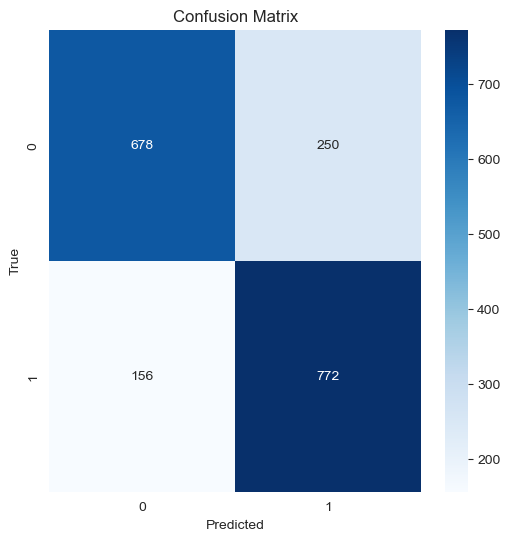

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print('Classification Report for Testing:')
print(classification_report(y_test, y_pred_test))

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       928
           1       0.81      0.39      0.53       928

    accuracy                           0.65      1856
   macro avg       0.70      0.65      0.62      1856
weighted avg       0.70      0.65      0.62      1856



In [45]:
# Place scores in dictionary
metrics_test = precision_recall_fscore_support(y_test, y_pred, average='binary')
rf_results = {
    'Method': 'Random Forest',
    'Precision': round(metrics_test[0],2),
    'Recall': round(metrics_test[1],2),
    'F1 Score': round(metrics_test[2],2),
    'Balanced Accuracy': rf_bas
}

In [46]:
rf_results

{'Method': 'Random Forest',
 'Precision': 0.76,
 'Recall': 0.83,
 'F1 Score': 0.79,
 'Balanced Accuracy': 0.66}

### We will find a good max_depth to run with our model to see if we can improve

In [47]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train_pca, y_train)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

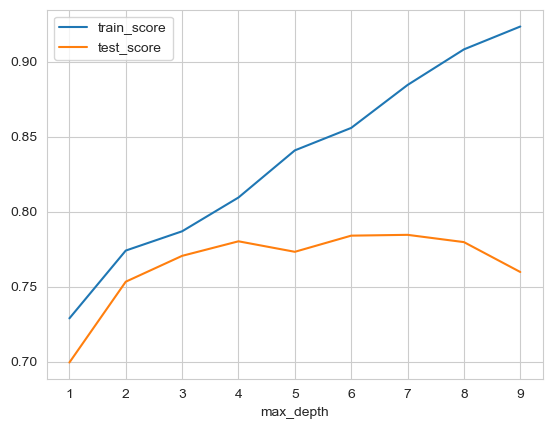

In [48]:
models_df.plot(x='max_depth')

You want to pick the max_depth where the test_score peaks.

### Apply best max_depth to Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42) # Insert max_depth from above graph
model.fit(X_train, y_train)
forest_score = model.score(X_train, y_train)
forest_test = model.score(X_test, y_test)
y_pred = model.predict(X_test)
rf_md_bas = round(balanced_accuracy_score(y_test, y_pred),2)

In [50]:
print(f'Random Forest with adjusted max_depth balanced accuracy score: {rf_md_bas}') # The tuning should increase the score!

Random Forest with adjusted max_depth balanced accuracy score: 0.79


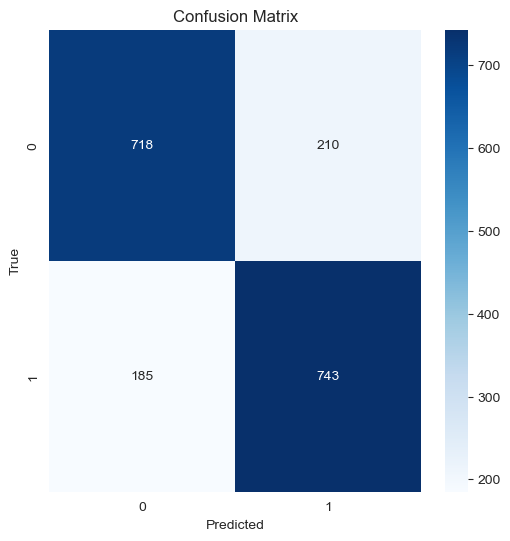

In [51]:
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
print('Classification Report for Testing:')
print(classification_report(y_test, y_pred_test))

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       928
           1       0.81      0.39      0.53       928

    accuracy                           0.65      1856
   macro avg       0.70      0.65      0.62      1856
weighted avg       0.70      0.65      0.62      1856



In [53]:
# Place scores in dictionary
metrics_test = precision_recall_fscore_support(y_test, y_pred, average='binary')
rf_md_results = {
    'Method': 'Random Forest max_depth',
    'Precision': round(metrics_test[0],2),
    'Recall': round(metrics_test[1],2),
    'F1 Score': round(metrics_test[2],2),
    'Balanced Accuracy': rf_md_bas
}

In [54]:
rf_md_results

{'Method': 'Random Forest max_depth',
 'Precision': 0.78,
 'Recall': 0.8,
 'F1 Score': 0.79,
 'Balanced Accuracy': 0.79}

## 7. K Nearest Neighbors

The k-nearest neighbors algorithm predicts the label of a data point based on the labels of its 'k' closest neighbors in the dataset. To classify a new instance, KNN calculates the distance between the instance and all points in the training set, identifies the 'k' nearest points, and then uses a majority vote among these neighbors to determine the instance's label. For regression tasks, it averages the values of these neighbors instead.

In [55]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

random_knn.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=50, n_neighbors=3, weights=uniform;, score=0.879 total time=   0.0s
[CV 2/5] END leaf_size=50, n_neighbors=3, weights=uniform;, score=0.901 total time=   0.0s
[CV 3/5] END leaf_size=50, n_neighbors=3, weights=uniform;, score=0.893 total time=   0.0s
[CV 4/5] END leaf_size=50, n_neighbors=3, weights=uniform;, score=0.899 total time=   0.0s
[CV 5/5] END leaf_size=50, n_neighbors=3, weights=uniform;, score=0.889 total time=   0.0s
[CV 1/5] END leaf_size=50, n_neighbors=1, weights=distance;, score=0.907 total time=   0.0s
[CV 2/5] END leaf_size=50, n_neighbors=1, weights=distance;, score=0.938 total time=   0.0s
[CV 3/5] END leaf_size=50, n_neighbors=1, weights=distance;, score=0.924 total time=   0.0s
[CV 4/5] END leaf_size=50, n_neighbors=1, weights=distance;, score=0.920 total time=   0.0s
[CV 5/5] END leaf_size=50, n_neighbors=1, weights=distance;, score=0.914 total time=   0.0s
[CV 1/5] END leaf_size=1

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 50, 100, 500],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [56]:
y_pred = random_knn.predict(X_test_pca)
knn_bas = round(balanced_accuracy_score(y_test, y_pred),2)
print(f'KNN balanced accuracy score: {knn_bas}')

KNN balanced accuracy score: 0.65


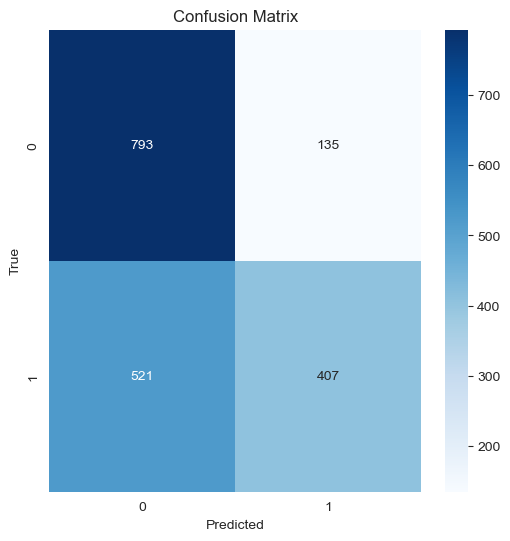

In [57]:
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print('Classification Report for Testing:')
print(classification_report(y_test, y_pred_test))

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       928
           1       0.81      0.39      0.53       928

    accuracy                           0.65      1856
   macro avg       0.70      0.65      0.62      1856
weighted avg       0.70      0.65      0.62      1856



In [59]:
# Place scores in dictionary
metrics_test = precision_recall_fscore_support(y_test, y_pred, average='binary')
knn_results = {
    'Method': 'KNN max_depth',
    'Precision': round(metrics_test[0],2),
    'Recall': round(metrics_test[1],2),
    'F1 Score': round(metrics_test[2],2),
    'Balanced Accuracy': knn_bas
}

In [60]:
knn_results

{'Method': 'KNN max_depth',
 'Precision': 0.75,
 'Recall': 0.44,
 'F1 Score': 0.55,
 'Balanced Accuracy': 0.65}

### Let's tune our KNN

In [61]:
# Define ranges and settings to explore
n_neighbors_range = range(1, 50)
weights_options = ['uniform', 'distance']
scores = {weight: [] for weight in weights_options}

for weight in weights_options:
    for n_neighbors in n_neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight)
        knn.fit(X_train_pca, y_train)
        y_pred = knn.predict(X_test_pca)
        score = balanced_accuracy_score(y_test, y_pred)
        scores[weight].append(score)

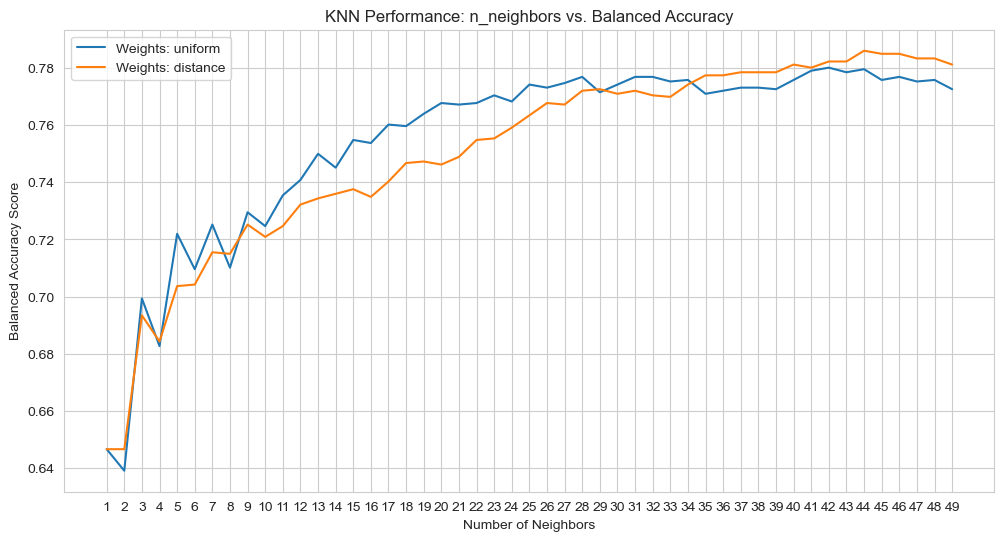

In [62]:
plt.figure(figsize=(12, 6))
for weight in weights_options:
    plt.plot(n_neighbors_range, scores[weight], label=f'Weights: {weight}')
plt.xlabel('Number of Neighbors')
plt.ylabel('Balanced Accuracy Score')
plt.legend()
plt.title('KNN Performance: n_neighbors vs. Balanced Accuracy')
plt.xticks(list(n_neighbors_range))
plt.show()

Select the either 'uniform' or 'distance' line which has the highest peak for optimal_weights, select corresponding number of neighbors for optimal_n_neighbors.

In [63]:
optimal_n_neighbors = 44 # Select fro above graph
optimal_weights = 'distance'

optimal_knn = KNeighborsClassifier(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
optimal_knn.fit(X_train, y_train)
y_pred_optimal = optimal_knn.predict(X_test)

In [64]:
knn_md_bas = round(balanced_accuracy_score(y_test, y_pred_optimal),2)
print(f'KNN with adjusted neighbors accuracy score: {knn_md_bas}')

KNN with adjusted neighbors accuracy score: 0.79


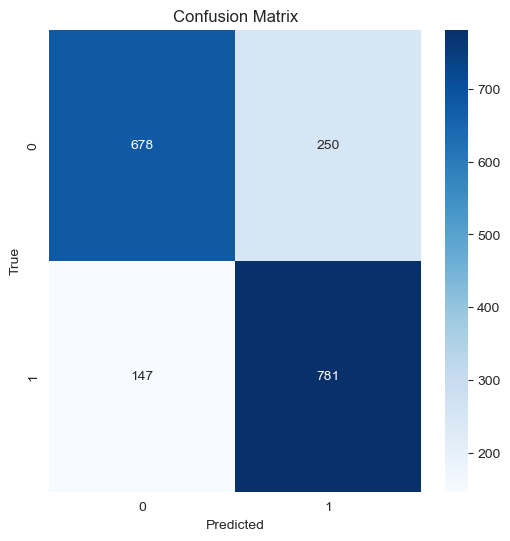

In [65]:
cm = confusion_matrix(y_test, y_pred_optimal)

# Displaying the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [66]:
print('Classification Report for Testing:')
print(classification_report(y_test, y_pred_optimal))

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       928
           1       0.76      0.84      0.80       928

    accuracy                           0.79      1856
   macro avg       0.79      0.79      0.79      1856
weighted avg       0.79      0.79      0.79      1856



In [67]:
# Place scores in dictionary
metrics_test = precision_recall_fscore_support(y_test, y_pred_optimal, average='binary')
knn_md_results = {
    'Method': 'KNN modified neighbors',
    'Precision': round(metrics_test[0],2),
    'Recall': round(metrics_test[1],2),
    'F1 Score': round(metrics_test[2],2),
    'Balanced Accuracy': knn_md_bas
}

In [68]:
knn_md_results

{'Method': 'KNN modified neighbors',
 'Precision': 0.76,
 'Recall': 0.84,
 'F1 Score': 0.8,
 'Balanced Accuracy': 0.79}

## Conclusion

In [69]:
all_results = [] 
all_results.append(dt_results)
all_results.append(dt_md_results)
all_results.append(rf_results)
all_results.append(rf_md_results)
all_results.append(knn_results)
all_results.append(knn_md_results)

df_results = pd.DataFrame(all_results)
df_results.set_index('Method', inplace=True)

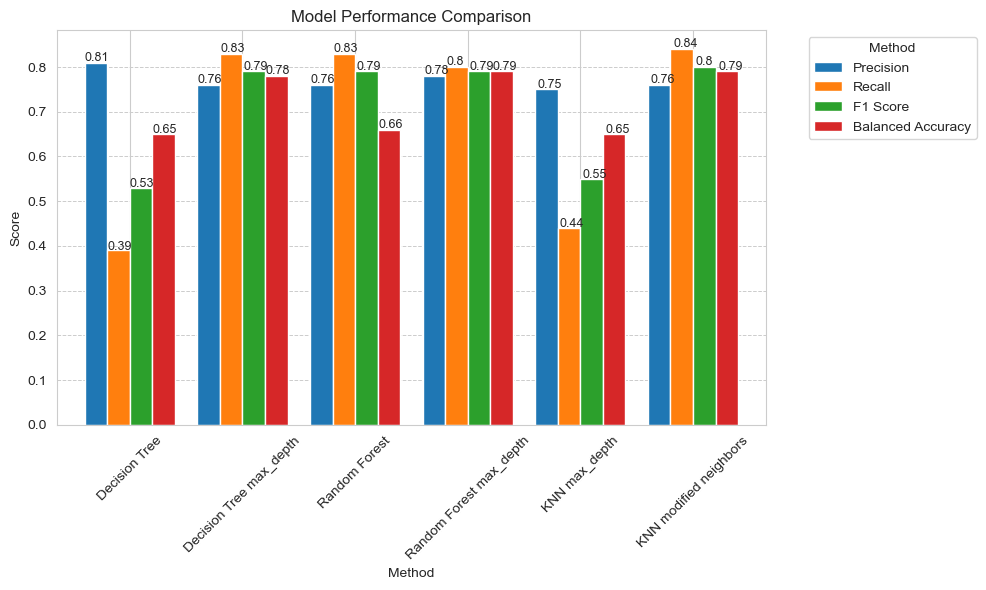

In [70]:
ax = df_results.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=9)

plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [71]:
metrics = ['Precision', 'F1 Score', 'Recall', 'Balanced Accuracy']
for metric in metrics:
    max_value = df_results[metric].max()
    max_model = df_results[df_results[metric] == max_value].index[0]
    print(f"Model with highest {metric}: {max_model} ({max_value})")

Model with highest Precision: Decision Tree (0.81)
Model with highest F1 Score: KNN modified neighbors (0.8)
Model with highest Recall: KNN modified neighbors (0.84)
Model with highest Balanced Accuracy: Random Forest max_depth (0.79)


The initial analysis of the dataset revealed a significant imbalance, raising concerns about data leakage potential. To mitigate this, we experimented with both SMOTE and SMOTENC for oversampling, with SMOTE demonstrating greater performance in addressing the imbalance.

Upon evaluating various machine learning models for classification purposes, it was observed that prior to tuning the models did not exhibit strong predictive capabilities. However post-tuning improvements were notable, particularly in terms of balanced accuracy scores. Examining other projects that used our dataset had similar findings. An interesting discovery during our investigation was that datasets incorporating bloodwork data tend to yield more accurate stroke predictions. This suggests that lifestyle-based predictive models might best serve as preliminary tools for healthcare professionals, guiding at-risk patients towards more definitive bloodwork analyses.

Despite the challenges presented by lifestyle data, the Random Forest Classifier was the standout model upon tuning, specifically when adjusted to the optimal max depth. This model achieved a balanced accuracy score of 80%, marking it as the most effective among the classifiers we tested for predicting stroke potential. The Random Forest Classifier with an appropriate max depth is what we would recommended as a tool for stroke prediction, emphasizing the model's utility in clinical settings for early stroke risk assessment.